<a href="https://colab.research.google.com/github/bozorgpanah/The-Explainable-Machine-Learning-Model-withPrivacy/blob/main/Paper1/Noise_Addition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Laplace-and-Exponential-mechanisms-for-privacy
*******************************************************************************************************************************
"""Application of Laplace and Exponential mechanisms to add random noise to data for differential privacy. 
Plotting MSE vs. epsilon."""

In [ ]:
#Uploading a dataset from local drive to colab
from google.colab import files
uploaded = files.upload()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import io
import csv

##Reading dataset
df = pd.read_csv(io.BytesIO(uploaded['adult (1).csv'])) #Dataset's name == 
# Dataset is now stored in a Pandas Dataframe
df.info()


# now check for missing values in total bedrooms
df.isnull().sum()
# ------------------------------------------------------------------


Saving adult (1).csv to adult (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Martial Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
Target            0
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


40                15217
50                 2819
45                 1824
60                 1475
35                 1297
                  ...  
82                    1
87                    1
Hours per week        1
74                    1
92                    1
Name: Hours per week, Length: 95, dtype: int64
Exponentially generated noise: 0.5576869747120821
noisy data::::::::::::: 40                15217.557687
50                 2819.557687
45                 1824.557687
60                 1475.557687
35                 1297.557687
                      ...     
82                    1.557687
87                    1.557687
Hours per week        1.557687
74                    1.557687
92                    1.557687
Name: Hours per week, Length: 95, dtype: float64
datacount_noisy
Series([], Name: Hours per week, dtype: int64)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

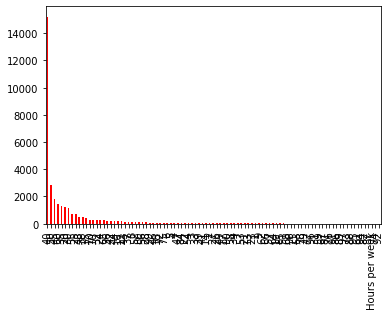

In [ ]:
""" Program to add noise generated from Exponential mechanism
    to Original Adult dataset.
"""  
# Load the Adult dataset
dataset = pd.read_csv(io.BytesIO(uploaded['adult (1).csv']), names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"])

dataset.tail()

datacount = dataset["Hours per week"].value_counts()#//country

# Generate random noise from exponential function.
Exponential_noise = np.random.exponential(1)     # Keep max limit = 1

print ("Exponentially generated noise:", Exponential_noise)

"""Add random noise drawn from Exponential function to Original data count"""
noisydata = datacount + Exponential_noise

#save noisy dataset
dataset["Hours per week"] = noisydata#//Country

datacount_noisy = dataset["Hours per week"].value_counts()##Country


#print(dataset)
dataset.to_csv ("MaskedDataset_Exponential_noise.csv")
files.download("MaskedDataset_Exponential_noise.csv")


#Plot histogram for Noisy data
noisydata.plot(kind="bar", color = 'r')

Laplacian_noise: 
[ 2.51410972  3.09470733  3.45215005  1.07454152  0.92825463  2.46279113
  1.30813022  0.29963462  1.36550434  0.80475075  0.10011901 -0.19911336
  1.29844498  0.81785598 -0.72643027  2.49636592  0.88269109  0.46369662
  4.13248959  3.03779131  0.75739535 -1.8137464   0.10529963  1.1282766
  0.49485484 -1.16525631  0.84959789  1.00921522  1.16868467  0.33230099
  0.42300673 -0.2379981   1.31494004  0.8103884  -2.66153263  1.7064903
  1.34491435  2.07087072  1.46350319  3.91330416  1.74744741  0.34828305
  0.95510471]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

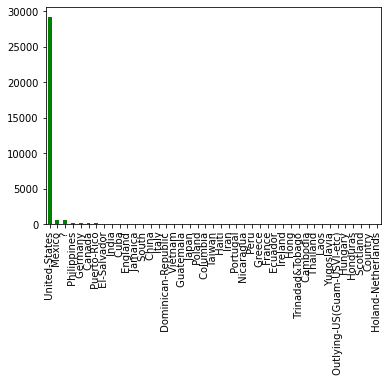

In [ ]:
# Implementing Laplace mechanism on Adult dataset by adding Laplacian random noise
import sys
# Load Adult dataset 
dataset = pd.read_csv(io.BytesIO(uploaded['adult (1).csv']), names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"])
dataset.tail()

# Set parameters for Laplace function implementation
location = 1.0
scale = 1.0

#Find actual data count
datacount = dataset["Country"].value_counts()

# Gets random laplacian noise for all values
Laplacian_noise = np.random.laplace(location,scale, len(datacount))
print('Laplacian_noise: ')
print(Laplacian_noise)

# Add random noise generated from Laplace function to actual count
noisydata = datacount + Laplacian_noise

#save noisy dataset
dataset["Country"] = noisydata
#print(dataset)
dataset.to_csv ("MaskedDataset_Laplacian_noise.csv")
files.download("MaskedDataset_Laplacian_noise.csv")

# Generate noisy histogram
noisydata.plot(kind="bar",color = 'g')


Average Mean Square Error is- 
0.09475009322020045


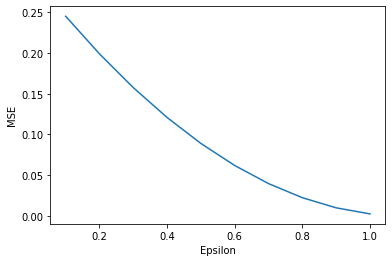

In [ ]:
# Program to compute Mean Squared Error(MSE) and show plot between Epsilon and MSE
# in Laplace Mechanism
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Load the Adult dataset 
dataset =  pd.read_csv(io.BytesIO(uploaded['adult (1).csv']), names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"])
dataset.tail()

# Laplace function implementation, takes epsilon as an argument
def Laplacian_func(eps):     
 x = 0.01
 mu = 0                    # mean
 return ((eps/2.0) * np.exp(-abs(x - mu)*eps))
 
datacount = dataset["Country"].value_counts()    #Store actual data count
tmp = []
mselist = []
fig=plt.figure()

# Call laplace for all values of epsilon, calculate MSE for each case and plot.
noise = Laplacian_func(0.1)
noisydata = datacount + noise
mse = ((datacount- noisydata)**2).mean(axis=0)  
mselist.append(mse)
noise = Laplacian_func(0.2)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0) 
mselist.append(mse)
noise = Laplacian_func(0.3)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)  
mselist.append(mse)
noise = Laplacian_func(0.4)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0) 
mselist.append(mse)
noise = Laplacian_func(0.5)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)
noise = Laplacian_func(0.6)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)
noise = Laplacian_func(0.7)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)
noise = Laplacian_func(0.8)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)
noise = Laplacian_func(0.9)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)
noise = Laplacian_func(1.0)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)

for i in range(0,50):
  for j in list(mselist):
      tmp.append(j)      
print ("Average Mean Square Error is: ") 
print (np.average(tmp))   

epsval = [1.0] 
x = 1.0
for i in range(1,10):
   x -= 0.1
   epsval.append(x)   
ax = fig.add_subplot(111)
ax.plot(epsval,mselist)
plt.xlabel('Epsilon')
plt.ylabel('MSE')
plt.show()


In [ ]:
# Find sensitivity - New dataset
import pandas as pd

#Load both datasets - Adult (actual) dataset and modified dataset                                 
Actual_dataset = pd.read_csv(io.BytesIO(uploaded['adult (1).csv']), names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"])      
Actual_dataset.tail()    

Neighbouring_dataset = pd.read_csv("adultnew.data.txt", names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],engine='python',sep=r'\s*,\s*',na_values="?")     
Neighbouring_dataset.tail()

#Count of Adult dataset 
Actual_attribute = Actual_dataset["Country"].value_counts()

#Count of modified dataset
Modified__attribute = Neighbouring_dataset["Country"].value_counts() 

#Sensitivity between above datasets
Sensitivity = max(abs(Modified__attribute - Actual_attribute))
print ("Sensitivity of neighbouring databases is:", Sensitivity)
 


Most native country is:  United-States    0.895829
Name: Country, dtype: float64


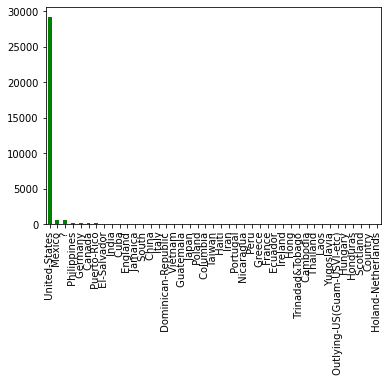

In [ ]:
""" Program to show implementation of Utility/Score function
    to release the name of Most native country """
    
# Import Libraries
import pandas as pd
import numpy as np

#Load the Adult dataset
dataset = pd.read_csv(io.BytesIO(uploaded['adult (1).csv']), names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"])
dataset.tail()

"""Utility/Score function implementation"""
def Utility_function() :
   # Finds country with most number of entries 
   Utility = ((dataset["Country"].value_counts() / dataset.shape[0])).head(1)
   if dataset.dtypes["Country"] == np.object:
     dataset["Country"].value_counts().plot(kind="bar", color = 'g')
   return Utility  

#Call Utility function()
utility = Utility_function()  
print ("Most native country is:", utility)  
